In [1]:
import numpy as np
import pandas as pd

In [107]:
def preprocess_file(file):
    data = np.load(file)
    data *= 1. + 0.02 * np.random.randn(*data.shape)
    
    # randomly shift the data
    shift = np.random.randint(-100, 200)
    data = np.roll(data, shift, axis=0)
    shift = np.random.randint(-100, 200)
    data = np.roll(data, shift, axis=1)
    
    
    # randomly flip the data AROUND THE Y AXIS
    if np.random.rand() > 0.25:
        data = np.flip(data, axis=0)
    # randomly flip the data AROUND THE X AXIS
    if np.random.rand() > 0.25:
        data = np.flip(data, axis=1)
    

    # Add random noise to random interval of length between 100 and 200, x axis
    for i in range(0, np.random.randint(0, 5)):
        start = np.random.randint(0, 256)
        end = start + np.random.randint(0, 32)
        end = min(end, 256)
        data[:, start:end,0] += (1 + np.random.randn(360, end - start)) * (0.5 + np.random.rand()/0.5) * 32
        data[:, start:end,1] += (1 + np.random.randn(360, end - start)) * (0.5 + np.random.rand()/0.5) * 32
    
    return data

In [144]:
df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/data.csv")
df_2 = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v2/data.csv")

# concatenate the two dataframes
df = pd.concat([df, df_2], ignore_index=True)
# sort df by depth
df = df.sort_values(by="depth", ascending=False).reset_index(drop=True)
df


,file,label,depth
0,/media/viktor/T7/gravitational-waves-kaggle-20...,1,32.999775
1,/media/viktor/T7/gravitational-waves-kaggle-20...,0,32.999775
2,/media/viktor/T7/gravitational-waves-kaggle-20...,0,32.999287
3,/media/viktor/T7/gravitational-waves-kaggle-20...,1,32.999287
4,/media/viktor/T7/gravitational-waves-kaggle-20...,1,32.999041
...,...,...,...
163995,/media/viktor/T7/gravitational-waves-kaggle-20...,1,9.715891
163996,/media/viktor/T7/gravitational-waves-kaggle-20...,0,9.715000
163997,/media/viktor/T7/gravitational-waves-kaggle-20...,1,9.715000
163998,/media/viktor/T7/gravitational-waves-kaggle-20...,1,9.714763


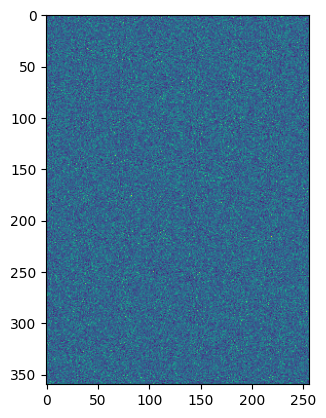

In [145]:
file = df["file"].iloc[0]
x = np.load(file)
import matplotlib.pyplot as plt
# visualize the image: it is a (360, 256, 2) image, so we need to take the first channel
plt.imshow(x[:, :, 0])

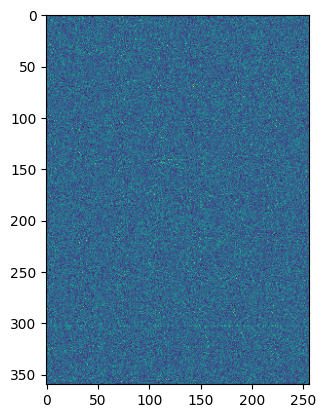

In [147]:
file = df["file"].iloc[0]
x = preprocess_file(file)
import matplotlib.pyplot as plt
# visualize the image: it is a (360, 256, 2) image, so we need to take the first channel
plt.imshow(x[:, :, 0])
# save the image as pdf
plt.savefig("preprocessed.pdf")

In [17]:
x = np.load(file)
x[:, 0:10,0].shape

(360, 10)

(array([1332., 1226., 1308., 1384., 1378., 1284., 1380., 1290., 1436.,
        1286., 1288., 1324., 1434., 1496., 1354., 1398., 1296., 1402.,
        1336., 1366., 1332., 1394., 1414., 1398., 1400., 1380., 1454.,
        1406., 1358., 1456., 1444., 1374., 1354., 1390., 1404., 1366.,
        1344., 1390., 1314., 1344., 1314., 1388., 1416., 1448., 1352.,
        1404., 1364., 1336., 1276., 1360., 1366., 1330., 1778., 2918.,
        3112., 3114., 3156., 3154., 2968., 3146., 3134., 2260., 1668.,
        1658., 1632., 1628., 1672., 1700., 1598., 1656., 1676., 1682.,
        1746., 1638., 1674., 1778., 1752., 1734., 1676., 1784., 1652.,
        1874., 1620., 1656., 1686., 1750., 1710., 1722., 1670., 1612.,
        1734., 1718., 1614., 1678., 1726., 1680., 1702., 1736., 1680.,
        1620.]),
 array([ 9.71476348,  9.9476136 , 10.18046371, 10.41331382, 10.64616394,
        10.87901405, 11.11186417, 11.34471428, 11.57756439, 11.81041451,
        12.04326462, 12.27611473, 12.50896485, 12.741814

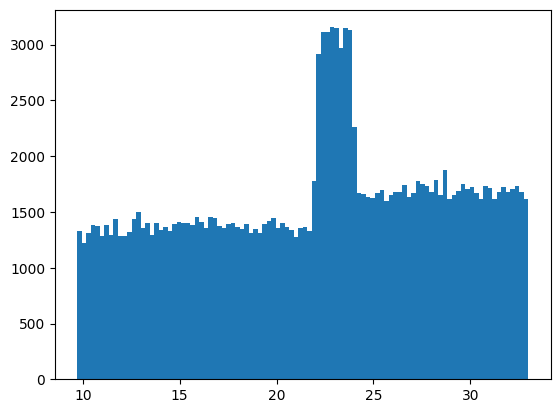

In [5]:
df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/data.csv")
df_2 = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v2/data.csv")

# concatenate the two dataframes
df = pd.concat([df, df_2], ignore_index=True)
import matplotlib.pyplot as plt
plt.hist(df["depth"], bins=100)